## Import basic libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Remember to upload digit_svm.joblib before continuing

## Loading the model and nessessary functions

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

/home/rohan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
options = {"model": "cfg/tiny-yolo-voc-3c.cfg",
           "load": -1, # loads from prev checkpoint
           "gpu": 0.5}


tfnet2 = TFNet(options)

Parsing cfg/tiny-yolo-voc-3c.cfg
Loading None ...
Finished in 0.00014138221740722656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13

In [4]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/tiny-yolo-voc-3c-750
INFO:tensorflow:Restoring parameters from ./ckpt/tiny-yolo-voc-3c-750


In [5]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)
    L=[]
    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3: # can change this to whatever percent depending on the minimim confidence you want
#             newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
#             newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            L.append(newImage[top_y:btm_y,top_x:btm_x])
    if len(L)==5:
        return L
    else:
        print('not all have confidence>0.3, error.')
        return -1

[{'bottomright': {'x': 212, 'y': 218},
  'confidence': 0.85569745,
  'label': 'name',
  'topleft': {'x': 42, 'y': 184}},
 {'bottomright': {'x': 196, 'y': 314},
  'confidence': 0.8507229,
  'label': 'text',
  'topleft': {'x': 57, 'y': 228}},
 {'bottomright': {'x': 71, 'y': 94},
  'confidence': 0.9577591,
  'label': 'cost',
  'topleft': {'x': 17, 'y': 37}},
 {'bottomright': {'x': 68, 'y': 337},
  'confidence': 0.9189888,
  'label': 'attack',
  'topleft': {'x': 20, 'y': 295}},
 {'bottomright': {'x': 236, 'y': 336},
  'confidence': 0.95337456,
  'label': 'health',
  'topleft': {'x': 193, 'y': 283}}]


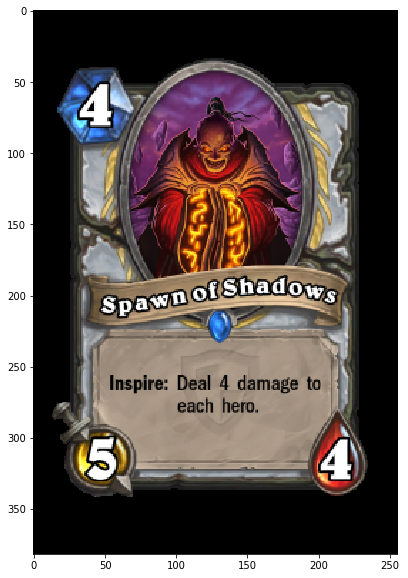

In [26]:
import pprint as pp

original_img = cv2.imread("sample_img/AT_012.png")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(original_img)
results = tfnet2.return_predict(original_img)
pp.pprint(results)

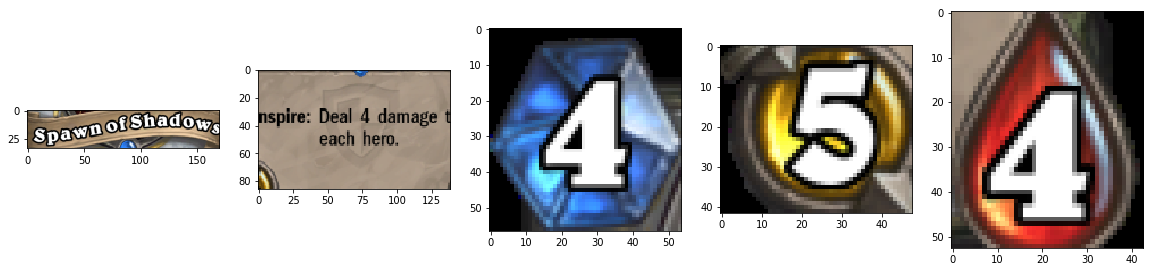

In [27]:
name,text,cost,attack,health = boxing(original_img, results)
fig, ax = plt.subplots(1,5,figsize=(20, 10))
ax[0].imshow(name)
ax[1].imshow(text)
ax[2].imshow(cost)
ax[3].imshow(attack)
ax[4].imshow(health)

In [28]:
#  for first time use
# ! pip install joblib

In [29]:
# pip install --upgrade scikit-learn 
# (NOT sklearn- different for whatever reason)

## Create a function that predicts a single given image below

In [34]:
def predict_digit(img): # takes in image as array
  
    img=Image.fromarray(img)
    img=img.resize((45,55))
#     print('type is:',type(img))
    img=np.array(img)
#     print('type is:',type(img))

    plt.imshow(img) # prints image

    img=img.reshape(1,-1)

    from joblib import dump, load
    clf = load('digit_svm_2.joblib') # loads the model

    print('Predicted value:',str(clf.predict(img)[0]),end='\n') # prints prediction

Predicted value: 1


/home/rohan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator SVC from version 0.20.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


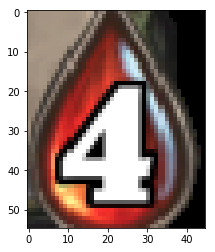

In [39]:
predict_digit(health)